# Inverse Fit Workflow — New API

Use `InverseFitWorkflow` to run zoom fits and visualize results. Supports both synthetic and real experimental data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import permeation as pm

import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 120
mpl.rcParams["figure.figsize"] = (6, 4)

## 1. Synthetic data with `from_synthetic`

Define base parameters and true step profile. The workflow forward-simulates and adds noise.

t_meas: (101,), pdp_meas: (101,)


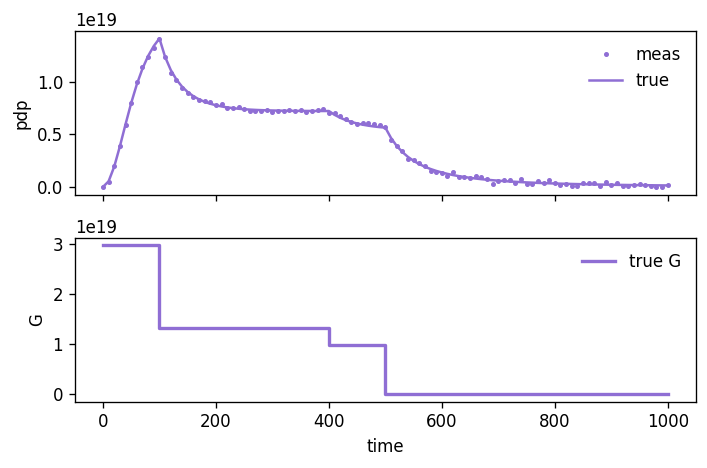

In [2]:
base_params = pm.Parameters()
base_params.ks = 3.3e19
base_params.kd = 1.2e-33
base_params.D = 1e-8

tstart = [0.0, 0.1, 0.4, 0.5]
true_vals = np.array([0.9, 0.4, 0.3, 0.0])

wf = pm.InverseFitWorkflow.from_synthetic(
    tstart,
    true_vals,
    base_params,
    noise_rel=0.01,
    rng=0,
    enforce_zero_after=0.5,
)

wf.plot(kind='G')
print(f"t_meas: {wf.t_meas.shape}, pdp_meas: {wf.pdp_meas.shape}")

## 2. Run zoom fit

`fit()` wraps `fit_G_steps_zoom` and stores the result. Pass any kwargs through to the solver.

In [3]:
res = wf.fit(
    n_levels=4,
    save_states=True,
    initial_guess=0.5,
    bounds=(0.0, 2.0),
    reg_l2=1e-6,
    reg_tv=1e-3,
    max_nfev=200,
    verbose=1,
    G_zero_after=0.5,
)

print(f"Fitted step values (last level): {res['x_hat']}")
print(f"Final cost: {res['history'][-1]['result'].cost}")

`ftol` termination condition is satisfied.
Function evaluations 9, initial cost 2.3801e+38, final cost 2.3385e+38, first-order optimality 1.40e+35.
`ftol` termination condition is satisfied.
Function evaluations 3, initial cost 2.3385e+38, final cost 2.3385e+38, first-order optimality 1.17e+34.
Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 19, initial cost 2.3385e+38, final cost 1.3646e+38, first-order optimality 2.70e+35.
`ftol` termination condition is satisfied.
Function evaluations 28, initial cost 1.3646e+38, final cost 2.4273e+37, first-order optimality 1.30e+35.
Fitted step values (last level): [0.8055699  0.35792227 0.41314272 0.31936216 0.47617018 0.47617018
 0.47617018 0.47617018]
Final cost: 2.427339754085824e+37


## 3. Plot via workflow

`wf.plot()` delegates to `permeation.viz.plotting`. Available kinds: `summary`, `zoom_frame`, `convergence`.

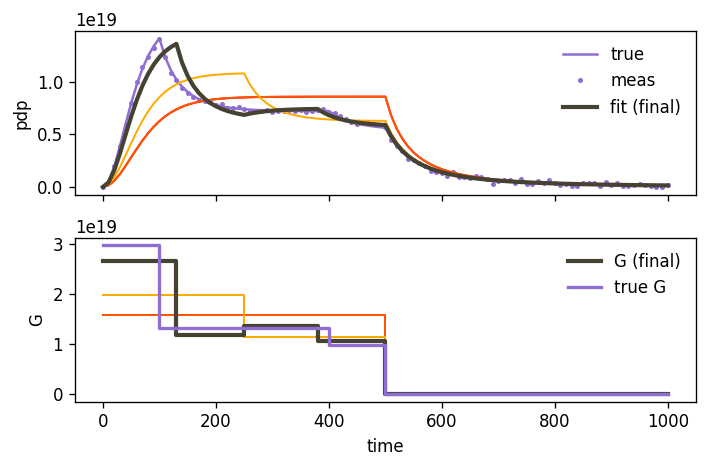

In [4]:
# Summary: measured vs fitted pdp and recovered G across zoom levels
fig, _ = wf.plot(kind="summary")
plt.show()

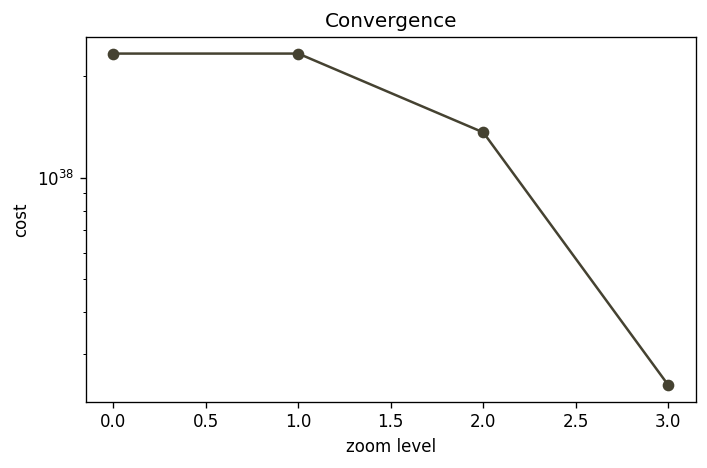

In [5]:
# Convergence: cost vs zoom level
fig = wf.plot(kind="convergence")
plt.show()

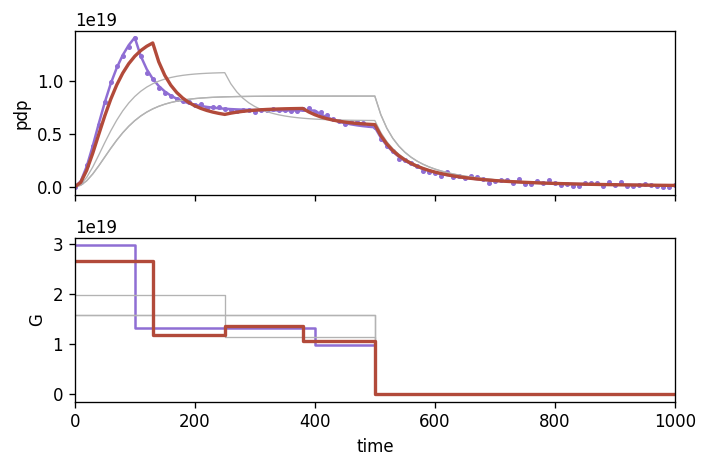

In [6]:
# Single zoom-frame (e.g. for animation)
fig = wf.plot(kind="zoom_frame", level=3)
plt.show()

In [ ]:
paths = wf.export_frames()

# from permeation.viz import export_zoom_states_frames
# 
# paths = export_zoom_states_frames(
#     wf.result, wf.t_meas, wf.pdp_meas, wf.base_params, enforce_zero_after=0.5
# )
# ffmpeg -y -framerate 30 -i level_0/frame_%03d.png -framerate 30 -i level_1/frame_%03d.png -framerate 30 -i level_2/frame_%03d.png -framerate 30 -i level_3/frame_%03d.png -filter_complex "[0:v][1:v][2:v][3:v]concat=n=4:v=1:a=0" -c:v libx264 -pix_fmt yuv420p all_levels.mp4


## 4. Real experimental data

For real measurements, construct the workflow directly with `t_meas` and `pdp_meas`. No true G for comparison.

In [ ]:
# Example: load your own t_meas, pdp_meas, base_params
# wf_real = pm.InverseFitWorkflow(t_meas, pdp_meas, base_params)
# res_real = wf_real.fit(n_levels=6)
# wf_real.plot(kind="summary")  # omits true pdp/G

# Reuse synthetic workflow as stand-in
# wf_real = pm.InverseFitWorkflow(
#     wf.t_meas,
#     wf.pdp_meas,
#     base_params,
# )
# wf_real.fit(n_levels=4, verbose=0)
# fig, _ = wf_real.plot(kind="summary")
# plt.show()